## Problem Statement:
Avocado is a fruit consumed by people heavily in the United States. 

#### Content
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

- Date - The date of the observation
- AveragePrice - the average price of a single avocado
- type - conventional or organic
- year - the year
- Region - the city or region of the observation
- Total Volume - Total number of avocados sold
- 4046 - Total number of avocados with PLU 4046 sold
- 4225 - Total number of avocados with PLU 4225 sold
- 4770 - Total number of avocados with PLU 4770 sold


#### Inspiration /Label 

The dataset can be seen in two angles to find the region and find the average price .

Task: One of Classification and other of Regression

In [647]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [648]:
#import the dataset
data= pd.read_csv('avocado.csv')
data

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


Dropping the unwanted column from the dataset unnamed:0 which is simply previous index number of the dataset.

In [649]:
#dropping the column
data.drop(columns='Unnamed: 0',inplace=True)
data

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [650]:
#shape of the dataset
data.shape

(18249, 13)

In [651]:
#checking the datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


All columns are in correct datatypes. Region column has to be encoded from categorical to numerical datatype.

In [652]:
#checking if there's any missing values
data.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

There are no missing values in the datasets.

Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
C

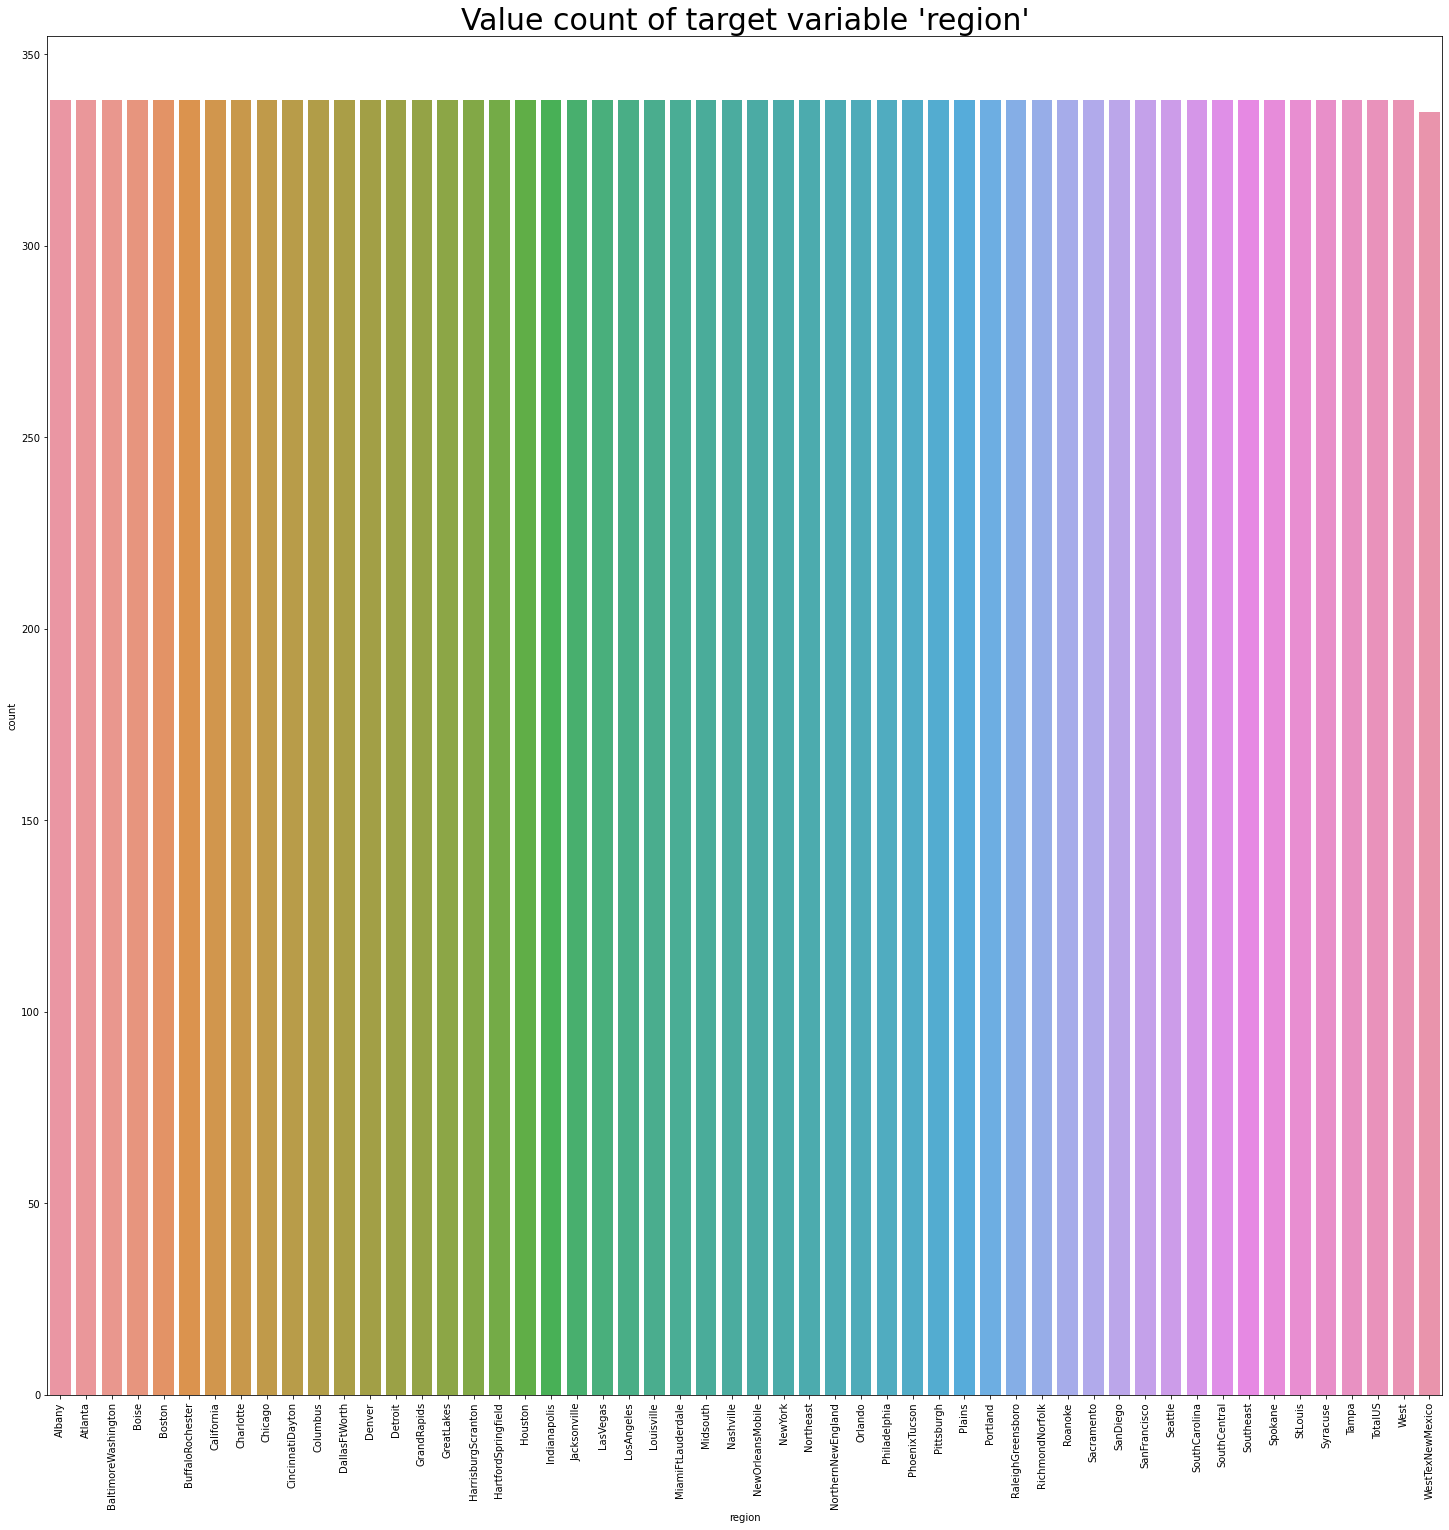

In [653]:
#checking if there's any imbalance in the region target variable
print(data.region.value_counts())
plt.figure(figsize=(25,25),facecolor='white')
sns.countplot(x='region',data=data)
plt.title("Value count of target variable 'region'",fontsize=30)
plt.xticks(rotation='vertical')
plt.show()

The dataset is not imbalanced for the prediction for the categorical target variable "Region".

- Albany                 338
- Sacramento             338
- Northeast              338
- NorthernNewEngland     338
- Orlando                338
- Philadelphia           338
- PhoenixTucson          338
- Pittsburgh             338
- Plains                 338
- Portland               338
- RaleighGreensboro      338
- RichmondNorfolk        338
- Roanoke                338
- SanDiego               338
- Atlanta                338
- SanFrancisco           338
- Seattle                338
- SouthCarolina          338
- SouthCentral           338
- Southeast              338
- Spokane                338
- StLouis                338
- Syracuse               338
- Tampa                  338
- TotalUS                338
- West                   338
- NewYork                338
- NewOrleansMobile       338
- Nashville              338
- Midsouth               338
- BaltimoreWashington    338
- Boise                  338
- Boston                 338
- BuffaloRochester       338
- California             338
- Charlotte              338
- Chicago                338
- CincinnatiDayton       338
- Columbus               338
- DallasFtWorth          338
- Denver                 338
- Detroit                338
- GrandRapids            338
- GreatLakes             338
- HarrisburgScranton     338
- HartfordSpringfield    338
- Houston                338
- Indianapolis           338
- Jacksonville           338
- LasVegas               338
- LosAngeles             338
- Louisville             338
- MiamiFtLauderdale      338
- WestTexNewMexico       335

In [654]:
#Descriptive statistics
data.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


We can say that some of the numerical features are skewed and Xlarge Bags feature has zeros in the 3 of 5 summary points. Lets visualize and see so that we can understand the pattern of the dataset.

In [655]:
#converting the dates datatype from object to pandas datetime 
data.Date=pd.to_datetime(data.Date)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          18249 non-null  datetime64[ns]
 1   AveragePrice  18249 non-null  float64       
 2   Total Volume  18249 non-null  float64       
 3   4046          18249 non-null  float64       
 4   4225          18249 non-null  float64       
 5   4770          18249 non-null  float64       
 6   Total Bags    18249 non-null  float64       
 7   Small Bags    18249 non-null  float64       
 8   Large Bags    18249 non-null  float64       
 9   XLarge Bags   18249 non-null  float64       
 10  type          18249 non-null  object        
 11  year          18249 non-null  int64         
 12  region        18249 non-null  object        
dtypes: datetime64[ns](1), float64(9), int64(1), object(2)
memory usage: 1.8+ MB


In [656]:
#visualising the numerical and categorical features 
#separating numerical and categorical features
categoical_data= data[['type','year','region']]
numerical_data=pd.DataFrame()

for column in data.columns:
    if column not in categoical_data:
        numerical_data[column]= data[column]
        
print('Numerical features:',numerical_data.columns,'\n','Categorical features:',categoical_data.columns)

Numerical features: Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags'],
      dtype='object') 
 Categorical features: Index(['type', 'year', 'region'], dtype='object')


In [657]:
#encoding the categorical variables
from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()

for column in categoical_data.drop(columns='year').columns:
    data[column]= encoder.fit_transform(data[column])

0    9126
1    9123
Name: type, dtype: int64


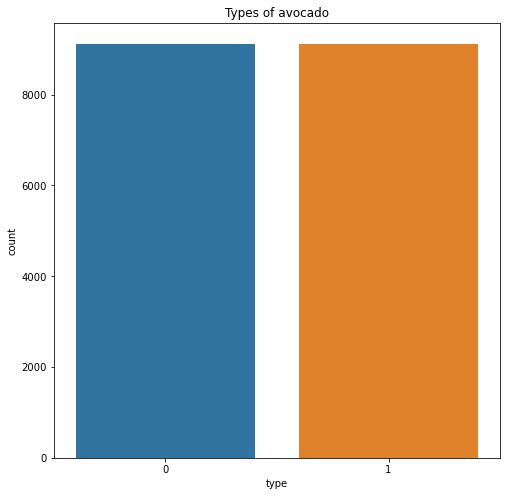

In [658]:
#visualising the individual features to understand the pattern
#categorical variables
plt.figure(figsize=(8,8),facecolor='white')
print(data.type.value_counts())
sns.countplot(x='type',data=data)
plt.title('Types of avocado')
plt.show()

The sales of both Conventional and organic type avocado are almost same as the sales in different region.

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64


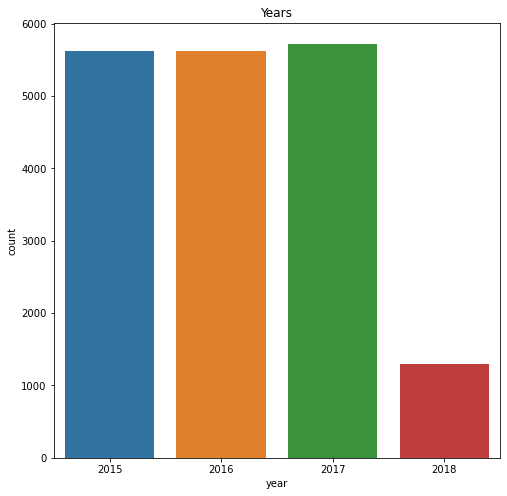

In [659]:
plt.figure(figsize=(8,8),facecolor='white')
print(data.year.value_counts())
sns.countplot(x='year',data=data)
plt.title('Years')
plt.show()

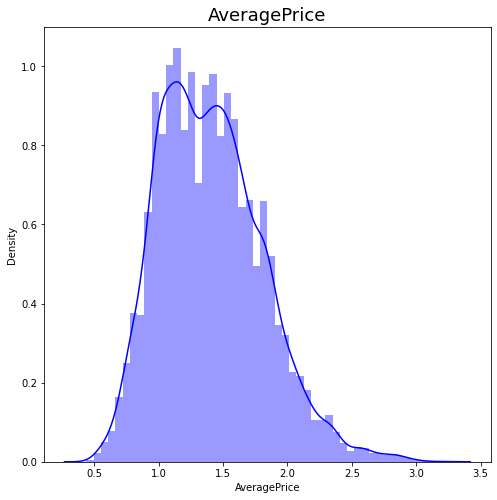

In [660]:
#data distribution of numerical variables 
plt.figure(figsize=(8,8),facecolor='white')
sns.distplot(data.AveragePrice,color='Blue')
plt.title("AveragePrice",fontsize=18)
plt.show()

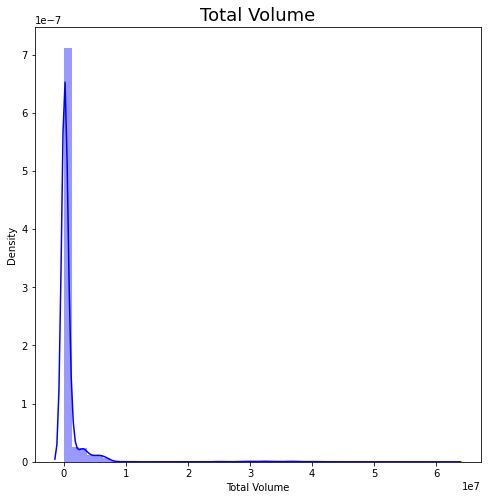

In [661]:
plt.figure(figsize=(8,8),facecolor='white')
sns.distplot(data['Total Volume'],color='Blue')
plt.title("Total Volume",fontsize=18)
plt.show()

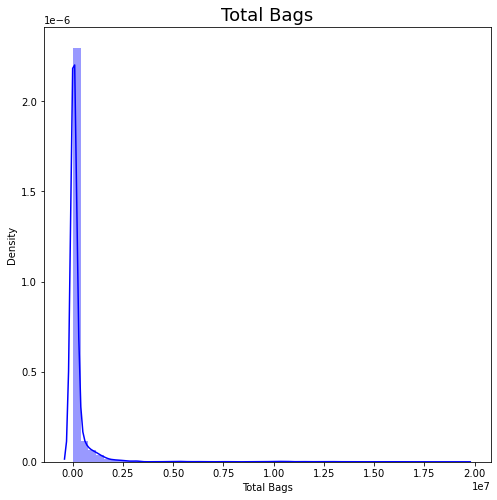

In [662]:
plt.figure(figsize=(8,8),facecolor='white')
sns.distplot(data['Total Bags'],color='Blue')
plt.title("Total Bags",fontsize=18)
plt.show()

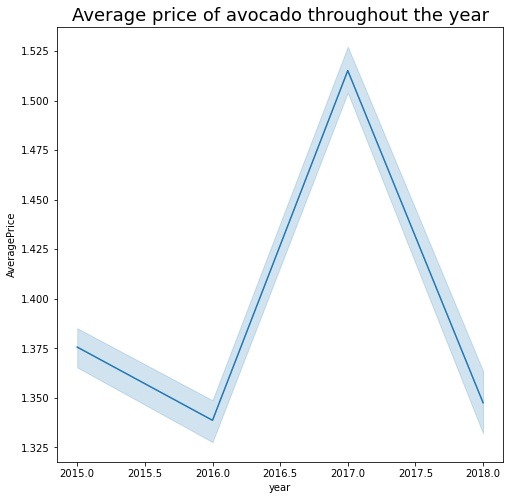

In [663]:
plt.figure(figsize=(8,8),facecolor='white')
sns.lineplot(x='year',y='AveragePrice',data=data)
plt.title("Average price of avocado throughout the year",fontsize=18)
plt.show()

the average price has dropped in 2016 and went to a new high in the month of  2017 and dropped in 2018 to the same level as 2016 

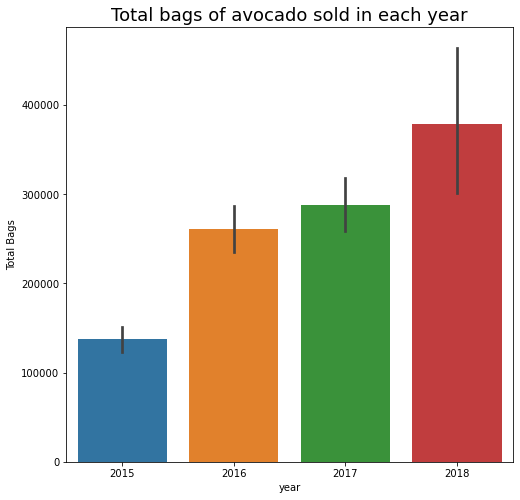

In [664]:
plt.figure(figsize=(8,8),facecolor='white')
sns.barplot(x='year',y='Total Bags',data=data)
plt.title("Total bags of avocado sold in each year",fontsize=18)
plt.show()

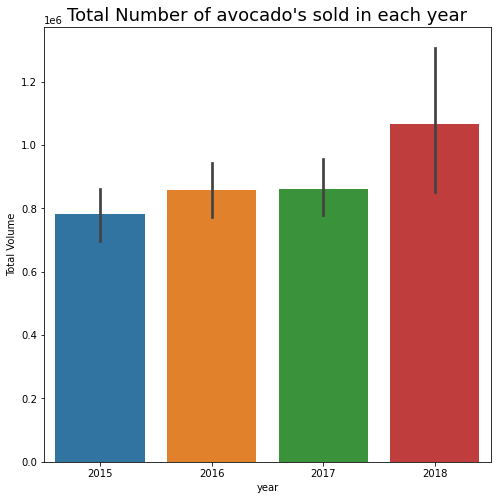

In [665]:
plt.figure(figsize=(8,8),facecolor='white')
sns.barplot(x='year',y='Total Volume',data=data)
plt.title("Total Number of avocado's sold in each year",fontsize=18)
plt.show()

sales of avocado is increasing throughout every past year
- 2015 has the least sales
- 2018 has the most sales

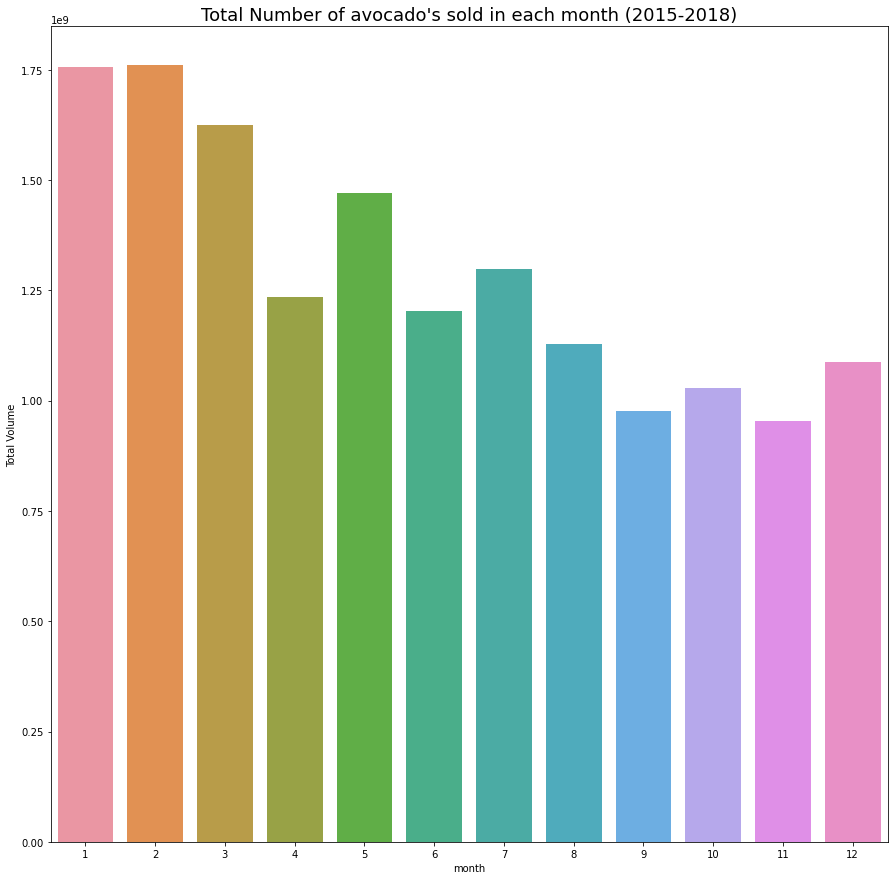

In [666]:
#visualising in which month there are highest sales 
df= data.copy()
df['month'] = df['Date'].dt.month
seasonal_sales=df.groupby('month')['Total Volume','Total Bags','AveragePrice'].sum()
seasonal_sales.reset_index(inplace=True)

plt.figure(figsize=(15,15),facecolor='white')
sns.barplot(x='month',y='Total Volume',data=seasonal_sales)
plt.title("Total Number of avocado's sold in each month (2015-2018)",fontsize=18)
plt.show()

- The sales are high in the month of january, february & march.
- likewise the sales are low from augest to november.

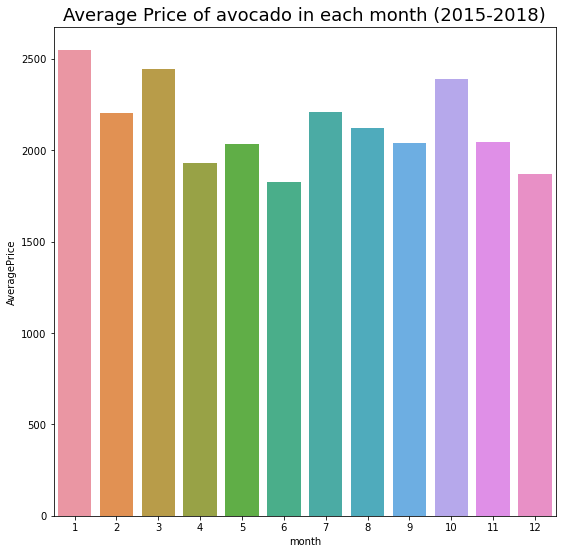

In [667]:
plt.figure(figsize=(9,9),facecolor='white')
sns.barplot(x='month',y='AveragePrice',data=seasonal_sales)
plt.title("Average Price of avocado in each month (2015-2018)",fontsize=18)
plt.show()

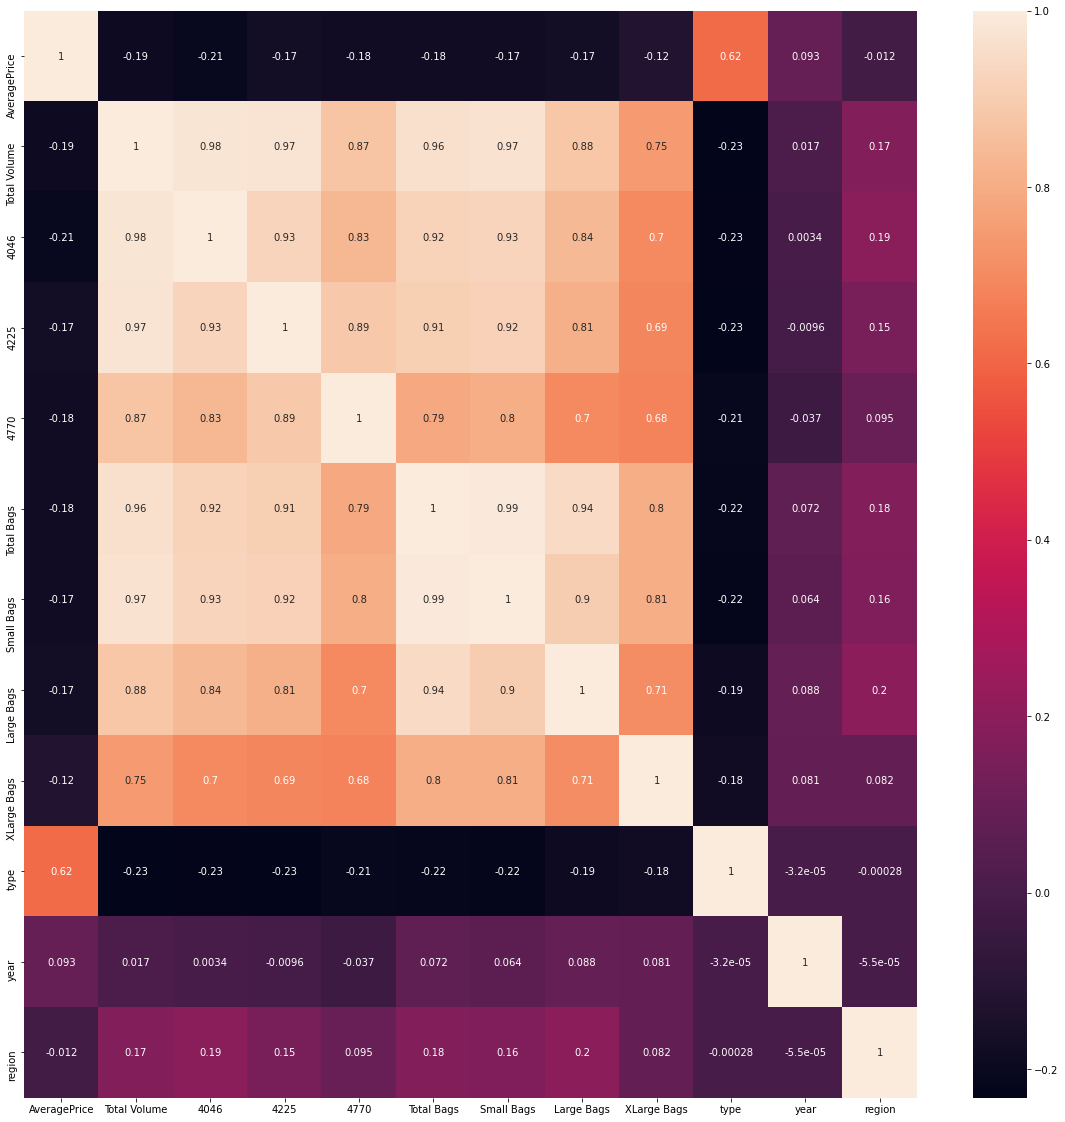

In [668]:
#seeing the correlation with the target variable (region & Average Price) 
#and multicollinearity between the features.
corr_data= data.corr()
plt.figure(figsize=(20,20),facecolor='white')
sns.heatmap(corr_data,annot=True)
plt.show()

The features are mostly correleated within other features.
- Total bags is multicollinear with 4046,4225,4770
- Total Bags is multicollinear with small, large,xlarge bags

In [669]:
data.drop(columns=['4046','4225','4770','Small Bags','Large Bags','XLarge Bags'],inplace=True)

numerical_data.drop(columns=['4046','4225','4770','Small Bags','Large Bags','XLarge Bags'],inplace=True)

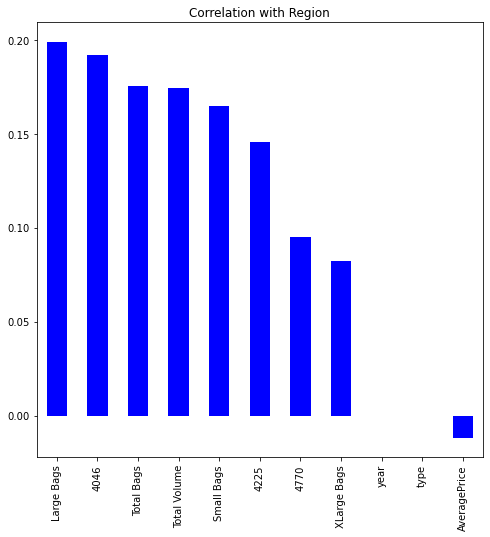

In [670]:
#visualizin the correlation with the target variable region from low to highly correlated
plt.figure(figsize=(8,8),facecolor='white')
corr_data.region.sort_values(ascending=False).drop(['region']).plot(kind='bar',color='b',title='Correlation with Region')
plt.show()

The target variable "region" are highly correlated with features **Large Bags, 4046, Totalbags** and least correlated with **types, year**.

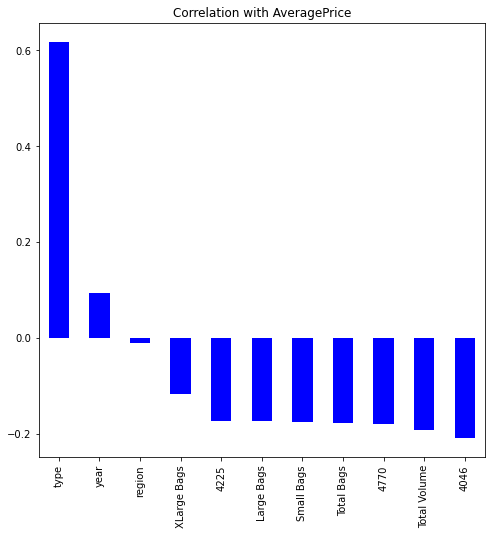

In [671]:
#visualizin the correlation with the target variable Average price from low to highly correlated
plt.figure(figsize=(8,8),facecolor='white')
corr_data.AveragePrice.sort_values(ascending=False).drop(['AveragePrice']).plot(kind='bar',color='b',title='Correlation with AveragePrice')
plt.show()

The target variable "AveragePrice" are highly correlated with features **type** and least correlated with **region**.

Also removing the date variable. Its not correlated in any ways to the target variable since we are looking at overal sales etc.

In [672]:
#dropping the date variable
data.drop(columns='Date',inplace=True)

In [673]:
#checking skewness in the dataset
data.skew()

AveragePrice    0.580303
Total Volume    9.007687
Total Bags      9.756072
type            0.000329
year            0.215339
region          0.000030
dtype: float64

Most of the features is skewed more. We need to reduce those skewness with power transform method.

In [674]:
#transforming the numerical data to reduce the skewness
from sklearn.preprocessing import power_transform
numercial_data= pd.DataFrame(power_transform(numerical_data.drop(columns='Date')), columns=numerical_data.drop(columns='Date').columns)
for column in numercial_data.columns:
    data[column]=numercial_data[column]

In [675]:
data.skew()

AveragePrice    0.005596
Total Volume    0.011171
Total Bags     -0.001626
type            0.000329
year            0.215339
region          0.000030
dtype: float64

skewness has been reduced. Now we should check for any outliers.

In [676]:
#checking if there's any outliers in the dataset
from scipy.stats import zscore
index= data[np.abs(zscore(numerical_data.drop(columns='Date')))>3].index
print(data.shape,'Before removing the outliers')
data.drop(index=index,inplace=True)
data.reset_index(drop=True,inplace=True)
print(data.shape,'After removing the outliers')

(18249, 6) Before removing the outliers
(17931, 6) After removing the outliers


In [677]:
#percentage of dataset lost
print(f'{((18249-17651)/18249)*100}% of the datset has been removed due to outliers')

3.276891884486821% of the datset has been removed due to outliers


### Prediction with target variable Region

In [708]:
#splitting the independent and dependent varinales (region)
#splitting the independent and dependent varinales (average price)
regprice_data= data.copy()
x= regprice_data.drop(columns='region')
y= regprice_data.region

In [679]:
#importing the libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [680]:
#selecting the best random score for the model

max_score=0
trainscore=0
maxrs=0
for i in range(0,100):
    lr= LogisticRegression()
    x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    train_pred= lr.predict(x_train)
    test_pred= lr.predict(x_test)
    score= accuracy_score(y_test,test_pred)
    trainscore= accuracy_score(y_train,train_pred)
    if round(score,3)==round(trainscore,3):
        print(f'At random state {i} the training accuracy is {trainscore} and test accuracy is {score}')
    

At random state 9 the training accuracy is 0.10492191857222533 and test accuracy is 0.10454418734318371
At random state 13 the training accuracy is 0.10568878973786949 and test accuracy is 0.10621689434067466
At random state 23 the training accuracy is 0.10534021193530396 and test accuracy is 0.10454418734318371
At random state 69 the training accuracy is 0.10603736754043502 and test accuracy is 0.10621689434067466
At random state 71 the training accuracy is 0.08784160624651423 and test accuracy is 0.08837468636743798
At random state 83 the training accuracy is 0.1004601226993865 and test accuracy is 0.0995260663507109


In [709]:
#separating the dataset into training and testing 
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.25,random_state=41)

In [682]:
#selecting the best k-fold which gives good cross validation score
from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cvs= cross_val_score(lr,x,y,cv=j)
    cvs_mean= cvs.mean()
    print(f'At cross fold {j} cross value score is {cvs_mean}')

At cross fold 2 cross value score is 0.017791174666295265
At cross fold 3 cross value score is 0.07043667391668061
At cross fold 4 cross value score is 0.0709396686555377
At cross fold 5 cross value score is 0.08287308495028603
At cross fold 6 cross value score is 0.08097726768193177
At cross fold 7 cross value score is 0.09464239283899525
At cross fold 8 cross value score is 0.09642517438173748
At cross fold 9 cross value score is 0.09017854883882971


selecting 5 has the k fold value for cross validation.

In [683]:
#LogisticRegression

LR= LogisticRegression()
LR.fit(x_train,y_train)
y_pred= LR.predict(x_test)

#cross valuation
cvs= cross_val_score(LR,x,y,cv=5)
cvs_mean= cvs.mean()

print("Accuracy", accuracy_score(y_test,y_pred))
print('-'*100)
print("Cross Validation Score", cvs_mean)
print('-'*100)
print("Confusion Matrix\n", confusion_matrix(y_test,y_pred))
print('-'*100)
print(classification_report(y_test,y_pred))

Accuracy 0.0965871068480928
----------------------------------------------------------------------------------------------------
Cross Validation Score 0.08287308495028603
----------------------------------------------------------------------------------------------------
Confusion Matrix
 [[ 6  0  0 ...  0  0  0]
 [10  0  0 ...  0  0  5]
 [ 4  0  1 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  3  0]
 [ 0  0  0 ...  0 17  0]
 [ 7  0  0 ...  0  0  0]]
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.02      0.07      0.03        87
           1       0.00      0.00      0.00        96
           2       0.01      0.01      0.01        72
           3       0.17      0.33      0.22        82
           4       0.03      0.06      0.04        66
           5       0.03      0.03      0.03        94
           6       0.10      0.09      0.09        90
           7       

In [684]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

rf= RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred= rf.predict(x_test)

#cross valuation
cvs= cross_val_score(rf,x,y,cv=5)
cvs_mean= cvs.mean()

print("Accuracy", accuracy_score(y_test,y_pred))
print('-'*100)
print("Cross Validation Score", cvs_mean)
print('-'*100)
print("Confusion Matrix\n", confusion_matrix(y_test,y_pred))
print('-'*100)
print(classification_report(y_test,y_pred))

Accuracy 0.5416016060673656
----------------------------------------------------------------------------------------------------
Cross Validation Score 0.29591429110294953
----------------------------------------------------------------------------------------------------
Confusion Matrix
 [[73  0  0 ...  0  0  0]
 [ 0 33  4 ...  0  0  3]
 [ 0  0 55 ...  0  0  2]
 ...
 [ 0  0  0 ... 49  0  0]
 [ 0  0  0 ...  1 60  0]
 [ 0  1  5 ...  0  0 48]]
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.75      0.84      0.79        87
           1       0.44      0.34      0.39        96
           2       0.59      0.76      0.67        72
           3       0.53      0.48      0.50        82
           4       0.53      0.73      0.62        66
           5       0.57      0.53      0.55        94
           6       0.86      0.67      0.75        90
           7       

In [685]:
#Decision tree classifier
from sklearn.tree import DecisionTreeClassifier

dt= DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred= dt.predict(x_test)

#cross valuation
cvs= cross_val_score(dt,x,y,cv=5)
cvs_mean= cvs.mean()

print("Accuracy", accuracy_score(y_test,y_pred))
print('-'*100)
print("Cross Validation Score", cvs_mean)
print('-'*100)
print("Confusion Matrix\n", confusion_matrix(y_test,y_pred))
print('-'*100)
print(classification_report(y_test,y_pred))

Accuracy 0.429623020298907
----------------------------------------------------------------------------------------------------
Cross Validation Score 0.25938422365824654
----------------------------------------------------------------------------------------------------
Confusion Matrix
 [[61  0  0 ...  0  0  0]
 [ 0 19  1 ...  0  0  4]
 [ 0  1 45 ...  0  0  6]
 ...
 [ 0  0  0 ... 49  0  0]
 [ 0  0  0 ...  1 50  0]
 [ 0  3  2 ...  0  0 41]]
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.68      0.70      0.69        87
           1       0.28      0.20      0.23        96
           2       0.54      0.62      0.58        72
           3       0.43      0.43      0.43        82
           4       0.38      0.42      0.40        66
           5       0.45      0.41      0.43        94
           6       0.77      0.63      0.70        90
           7       0

In [686]:
#Gradient Boost Classifier
from sklearn.ensemble import GradientBoostingClassifier

gb= GradientBoostingClassifier()
gb.fit(x_train,y_train)
y_pred= gb.predict(x_test)

#cross valuation
cvs= cross_val_score(gb,x,y,cv=7)
cvs_mean= cvs.mean()

print("Accuracy", accuracy_score(y_test,y_pred))
print('-'*100)
print("Cross Validation Score", cvs_mean)
print('-'*100)
print("Confusion Matrix\n", confusion_matrix(y_test,y_pred))
print('-'*100)
print(classification_report(y_test,y_pred))

Accuracy 0.41155476243586886
----------------------------------------------------------------------------------------------------
Cross Validation Score 0.2895450701772698
----------------------------------------------------------------------------------------------------
Confusion Matrix
 [[67  0  0 ...  0  0  0]
 [ 0 17  2 ...  0  0  5]
 [ 0  0 46 ...  0  0  0]
 ...
 [ 0  0  0 ... 49  0  0]
 [ 0  0  0 ...  1 58  0]
 [ 0  1  6 ...  0  0 28]]
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.69      0.77      0.73        87
           1       0.29      0.18      0.22        96
           2       0.47      0.64      0.54        72
           3       0.53      0.37      0.43        82
           4       0.37      0.59      0.46        66
           5       0.45      0.40      0.42        94
           6       0.74      0.50      0.60        90
           7       

In [687]:
#support vector classifier
from sklearn.svm import SVC

svc= SVC()
svc.fit(x_train,y_train)
y_pred= svc.predict(x_test)

#cross valuation
cvs= cross_val_score(svc,x,y,cv=5)
cvs_mean= cvs.mean()

print("Accuracy", accuracy_score(y_test,y_pred))
print('-'*100)
print("Cross Validation Score", cvs_mean)
print('-'*100)
print("Confusion Matrix\n", confusion_matrix(y_test,y_pred))
print('-'*100)
print(classification_report(y_test,y_pred))

Accuracy 0.014499219272808388
----------------------------------------------------------------------------------------------------
Cross Validation Score 0.034576787870806314
----------------------------------------------------------------------------------------------------
Confusion Matrix
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        87
           1       0.00      0.00      0.00        96
           2       0.00      0.00      0.00        72
           3       0.00      0.00      0.00        82
           4       0.00      0.00      0.00        66
           5       0.00      0.00      0.00        94
           6       0.00      0.00      0.00        90
           7       0.00      0.00      0.00        8

In [688]:
from xgboost import XGBClassifier
xgb= XGBClassifier()
xgb.fit(x_train,y_train)
y_pred= xgb.predict(x_test)

#cross valuation
cvs= cross_val_score(xgb,x,y,cv=5)
cvs_mean= cvs.mean()

print("Accuracy", accuracy_score(y_test,y_pred))
print('-'*100)
print("Cross Validation Score", cvs_mean)
print('-'*100)
print("Confusion Matrix\n", confusion_matrix(y_test,y_pred))
print('-'*100)
print(classification_report(y_test,y_pred))

[21:31:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:31:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:32:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:33:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

**The RandomForestRegressor Model gives accuracy score of 54%, thus selecting this model.**

In [710]:
#hyperparameter tuning 
from sklearn.model_selection import GridSearchCV

rf= RandomForestClassifier()
param= {"n_estimators":[5,25,50,100],
        "max_depth":[1,3,5,7,9],
        "min_samples_leaf":[2,3,4,5],
        "min_samples_split":[2,3,4,5]}

grp= GridSearchCV(rf,param_grid=param)
grp.fit(x_train,y_train)
print(grp.best_params_)

{'max_depth': 9, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 100}


In [711]:
#model after hyperparameter tuning
rf= grp.best_estimator_ 
rf.fit(x_train,y_train)

#predict
y_pred= rf.predict(x_test)

#accuracy score
print("Accuracy\n", accuracy_score(y_test,y_pred))
print('-'*100)
print("Confusion Matrix\n", confusion_matrix(y_test,y_pred))
print('-'*100)
print(classification_report(y_test,y_pred))

Accuracy
 0.4093241133169752
----------------------------------------------------------------------------------------------------
Confusion Matrix
 [[71  0  0 ...  0  0  0]
 [ 0 24  0 ...  0  0  0]
 [ 0  0 45 ...  0  0  0]
 ...
 [ 0  0  0 ... 49  0  0]
 [ 0  0  0 ...  1 61  0]
 [ 0  0  6 ...  0  0 30]]
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.48      0.82      0.61        87
           1       0.47      0.25      0.33        96
           2       0.52      0.62      0.57        72
           3       0.70      0.38      0.49        82
           4       0.31      0.50      0.38        66
           5       0.40      0.35      0.37        94
           6       0.80      0.58      0.67        90
           7       0.27      0.44      0.34        88
           8       0.51      0.74      0.60        80
           9       0.29      0.50      0.37        70


### Prediction with target variable Average Price

In [691]:
#splitting the independent and dependent varinales (average price)
avgprice_data= data.copy()
x= avgprice_data.drop(columns='AveragePrice')
y= avgprice_data.AveragePrice

In [692]:
#standardising each features within a range using standard scaler
from sklearn.preprocessing import StandardScaler
scalar= StandardScaler()
new_x= pd.DataFrame(scalar.fit_transform(x.drop(columns='type')),columns=x.drop(columns='type').columns)
x=pd.concat([new_x,avgprice_data.type],axis=1)

In [693]:
#splitting the dataset into train and test
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=49)

In [694]:
#best cross fold value
from sklearn.model_selection import cross_val_score
rf= RandomForestRegressor()
for j in range(2,10):
    cvs= cross_val_score(rf,x,y,cv=j)
    cvs_mean= cvs.mean()
    print(f'At cross fold {j} cross value score is {cvs_mean}')

At cross fold 2 cross value score is -0.50306381339144
At cross fold 3 cross value score is -0.25323393082955187
At cross fold 4 cross value score is -0.1863232186381724
At cross fold 5 cross value score is 0.0975135321727932
At cross fold 6 cross value score is -0.08177730488292378
At cross fold 7 cross value score is 0.2187286554662021
At cross fold 8 cross value score is 0.15765354251749997
At cross fold 9 cross value score is 0.2324447842062733


selecting 7 as the kfold for cross validation score

In [702]:
#LinearRegression
from sklearn.linear_model import LinearRegression

lr= LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

#cross valuation
cvs= cross_val_score(lr,x,y,cv=7)
cvs_mean= cvs.mean()

print('R2 score',r2_score(y_test,y_pred))
print('cross valuation mean for cross fold 7 is',cvs_mean)
print('Mean Squared Error',mean_squared_error(y_test,y_pred))

R2 score 0.4403116894375114
cross valuation mean for cross fold 7 is 0.04171590844672833
Mean Squared Error 0.532965419110239


In [703]:
#lasso model for reglularization
from sklearn.linear_model import Lasso,LassoCV
lassocv= LassoCV()
lassocv.fit(x_train,y_train)
print('alpha value:',lassocv.alpha_)
ls= Lasso(alpha=lassocv.alpha_)
ls.fit(x_train,y_train)
y_lspred= ls.predict(x_test)

#cross valuation
cvs= cross_val_score(lassocv,x,y,cv=7)
cvs_mean= cvs.mean()

print('R2 score',r2_score(y_test,y_lspred))
print('cross valuation mean for cross fold 7 is',cvs_mean)
print('Mean squared error',mean_squared_error(y_test,y_lspred))

alpha value: 0.0005777003466868355
R2 score 0.4404820478590191
cross valuation mean for cross fold 7 is 0.05223076694857414
Mean squared error 0.5328031946259961


In [704]:
#DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

dt= DecisionTreeRegressor()
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)

#cross valuation
cvs= cross_val_score(dt,x,y,cv=7)
cvs_mean= cvs.mean()

print('R2 score',r2_score(y_test,y_pred))
print('cross valuation mean for cross fold 7 is',cvs_mean)
print('Mean Squared Error',mean_squared_error(y_test,y_pred))

R2 score 0.7162309282252781
cross valuation mean for cross fold 7 is -0.2784213609934798
Mean Squared Error 0.27022022689189695


In [705]:
#RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

rf= RandomForestRegressor()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

#cross valuation
cvs= cross_val_score(rf,x,y,cv=7)
cvs_mean= cvs.mean()

print('R2 score',r2_score(y_test,y_pred))
print('cross valuation mean for cross fold 7 is',cvs_mean)
print('Mean Squared Error',mean_squared_error(y_test,y_pred))

R2 score 0.8352167807364097
cross valuation mean for cross fold 7 is 0.22313177433792658
Mean Squared Error 0.15691547573843498


In [706]:
#GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor

gbr= GradientBoostingRegressor()
gbr.fit(x_train,y_train)
y_pred=gbr.predict(x_test)

#cross valuation
cvs= cross_val_score(gbr,x,y,cv=7)
cvs_mean= cvs.mean()

print('R2 score',r2_score(y_test,y_pred))
print('cross valuation mean for cross fold 7 is',cvs_mean)
print('Mean Squared Error',mean_squared_error(y_test,y_pred))

R2 score 0.6586567126096475
cross valuation mean for cross fold 7 is 0.34676523149344607
Mean Squared Error 0.32504550263276283


In [707]:
#xgboost
import xgboost 

xgb= xgboost.XGBRegressor()
xgb.fit(x_train,y_train)
y_pred=xgb.predict(x_test)

#cross valuation
cvs= cross_val_score(xgb,x,y,cv=7)
cvs_mean= cvs.mean()

print('R2 score',r2_score(y_test,y_pred))
print('cross valuation mean for cross fold 7 is',cvs_mean)
print('Mean Squared Error',mean_squared_error(y_test,y_pred))

R2 score 0.8246743703372502
cross valuation mean for cross fold 7 is 0.3979473288985008
Mean Squared Error 0.1669545279587204


**The RandomForestRegressor Model gives accuracy score of 84%, thus selecting this model.**

In [ ]:
#hyperparameter tuning for Randomforest
rf= RandomForestRegressor()
param= {'n_estimators':[10,100,200,500,1000],
        'criterion':["mse", "mae"],
        'max_depth':[2,5,6,7,9,],
        'min_samples_split':[3,5,10],
        'min_samples_leaf':[1,5,10]}

search= GridSearchCV(rf,param_grid=param)
search.fit(x_train,y_train)
print(f'Best parameters is {search.best_params_}')

In [ ]:
rf= search.best_estimator_
rf.fit(x_train,y_train)
print(f'our model fits {(rf.score(x_train,y_train))*100}% of the dataset')
y_pred=rf.predict(x_test)

#cross valuation
cvs= cross_val_score(rf,x,y,cv=4)
cvs_mean= cvs.mean()

print(f'our r2 score is {(r2_score(y_test,y_pred)*100)}%')
print('cross valuation mean for cross fold 4 is',cvs_mean)